In [29]:
import pandas as pd
import numpy as np

In [30]:
import matplotlib.pyplot as plt

import seaborn as sns #要注意的是一旦导入了seaborn，matplotlib的默认作图风格就会被覆盖成seaborn的格式

%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth',400)

In [31]:
import os 

In [32]:
for file_name in os.listdir():
    file_name_pre, file_name_type = file_name.split('.')
    print(file_name_pre + "= pd.read_csv('{s}')".format(s = file_name))
    if file_name_type =='csv':
        exec(file_name_pre + "= pd.read_csv('{s}')".format(s = file_name))
    elif file_name_type =='xlsx':
        exec(file_name_pre + "= pd.read_excel('{s}')".format(s = file_name))
    else:
        print(file_name)

df_temp_result_5= pd.read_csv('df_temp_result_5.csv')
df_temp_result_2= pd.read_csv('df_temp_result_2.csv')
df_result_27= pd.read_csv('df_result_27.csv')
Untitled= pd.read_csv('Untitled.ipynb')
Untitled.ipynb
df_result_2= pd.read_csv('df_result_2.csv')
df_result_26= pd.read_csv('df_result_26.csv')
df_result_1= pd.read_csv('df_result_1.csv')
天创商户在易宝的商编= pd.read_csv('天创商户在易宝的商编.xlsx')
df_result_25= pd.read_csv('df_result_25.csv')
df_result_35= pd.read_csv('df_result_35.csv')
df_result_5= pd.read_csv('df_result_5.csv')
df_result_11= pd.read_csv('df_result_11.csv')
df_result_14= pd.read_csv('df_result_14.csv')
df_result_17= pd.read_csv('df_result_17.csv')
= pd.read_csv('.ipynb_checkpoints')
.ipynb_checkpoints
df_temp_result_10= pd.read_csv('df_temp_result_10.csv')
df_temp_result_8= pd.read_csv('df_temp_result_8.csv')


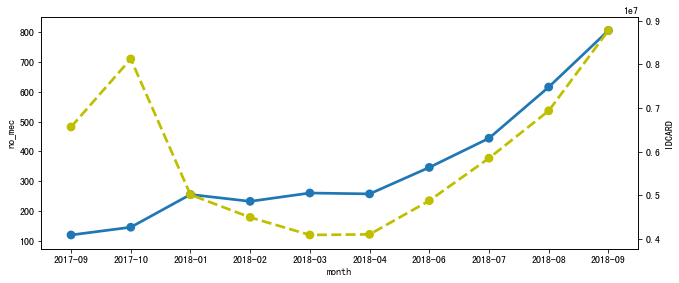

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(10.7, 4.27)
sns.pointplot(x = 'month', y = 'no_mec', data = df_result_2, ax = ax, )
ax2 = ax.twinx()
sns.pointplot(x = 'month', y = 'IDCARD', data = df_result_2, ax = ax2, color= 'y', linestyles= '--', label="A")

In [34]:
df_result_30 = df_result_14.groupby(['no_mec'])['flag_overdue', 'IDCARD'].sum().reset_index()

In [35]:
df_result_26 = df_result_25.sort_values('IDCARD_all', ascending= False).reset_index()

In [36]:
df_result_27 = df_result_26[df_result_26['IDCARD_all'] > 15000]

In [37]:
df_result_14.head()

,no_mec,month,flag_overdue,IDCARD,fpd
0,10012448854,2018-03,9,12,0.750000
1,10012448854,2018-04,78,110,0.709091
2,10012448854,2018-05,117,154,0.759740
3,10012448854,2018-06,12,13,0.923077
4,10012469117,2018-01,1190,15850,0.075079


In [38]:
df_result_30['fpd'] = df_result_30['flag_overdue']/df_result_30['IDCARD']

In [39]:
df_result_25[df_result_25['no_mec'] == 10012448854]

,no_mec,IDCARD_intersection,IDCARD_all,IDCARD_pct
0,10012448854,179,203,0.881773


In [40]:
df_result_14[df_result_14['no_mec'] == 10012448854]

,no_mec,month,flag_overdue,IDCARD,fpd
0,10012448854,2018-03,9,12,0.750000
1,10012448854,2018-04,78,110,0.709091
2,10012448854,2018-05,117,154,0.759740
3,10012448854,2018-06,12,13,0.923077


In [41]:
df_result_31 = df_result_1.groupby(['no_mec'])['IDCARD'].mean().reset_index()

In [42]:
df_result_32 = df_result_31[df_result_31['IDCARD'] > 15000]

In [43]:
df_result_33= df_result_32.merge(df_result_30, on = ['no_mec'], how = 'left')

In [44]:
df_result_33 = df_result_33.dropna()

In [45]:
df_result_25.head()

,no_mec,IDCARD_intersection,IDCARD_all,IDCARD_pct
0,10012448854,179,203,0.881773
1,10012469117,59006,92721,0.636382
2,10012470020,873930,2975514,0.293707
3,10012471228,98905,109748,0.901201
4,10012472954,3687,26792,0.137616


In [46]:
df_result_34 = df_result_33.merge(df_result_25, how = 'left')

In [47]:
df_result_34[(df_result_34['IDCARD_pct'] > 0.75) & (df_result_34['fpd'] > 0.8)].shape

(36, 8)

In [48]:
df_result_34['pct_flag'] = np.where(df_result_34['IDCARD_pct'] > 0.75 , 1, 0)

In [49]:
df_result_34['fpd_flag'] = np.where(df_result_34['fpd'] > 0.8 , 1, 0)

In [50]:
df_result_34.head()

,no_mec,IDCARD_x,flag_overdue,IDCARD_y,fpd,IDCARD_intersection,IDCARD_all,IDCARD_pct,pct_flag,fpd_flag
0,10012470020,972080.700000,1625304.0,2834575.0,0.573385,873930,2975514,0.293707,0,0
1,10012996445,140372.100000,299059.0,328084.0,0.911532,673943,848287,0.794475,1,1
2,10013631809,79596.600000,34884.0,149188.0,0.233826,42822,223105,0.191937,0,0
3,10013642751,51502.400000,213903.0,263353.0,0.812229,192189,261761,0.734216,0,1
4,10013687590,222922.285714,121255.0,430346.0,0.281762,740720,857885,0.863426,1,0


In [51]:
df_result_34.groupby(['fpd_flag', 'pct_flag']).agg({'IDCARD_x':'sum', 'no_mec':'count'}).reset_index()

,fpd_flag,pct_flag,IDCARD_x,no_mec
0,0,0,2.249875e+06,15
1,0,1,2.813288e+06,48
2,1,0,9.149456e+05,5
3,1,1,1.791247e+06,36


In [52]:
df_result_35 = df_result_34[(df_result_34.fpd_flag ==1) & (df_result_34.pct_flag == 1) ].sort_values('IDCARD_x', ascending = False)

In [53]:
df_result_35.to_csv('df_result_35.csv', index = False)

In [56]:
df_result_35['IDCARD_x'].sum()

1791247.0111111111

In [57]:
df_result_35['IDCARD_x'].mean()

49756.861419753084

In [64]:
df_result_35[~df_result_35['no_mec'].isin(['10017740966', '10013922543', '10022451722', '10023471494', '10020834349', '10021312187'])]['IDCARD_x'].sum()

1636075.1944444445

In [62]:
df_result_35['no_mec'].isin(['10017740966', '10013922543', '10022451722', '10020834349', '10021312187']

SyntaxError: unexpected EOF while parsing (<ipython-input-62-0d65093b4d02>, line 1)